<a href="https://colab.research.google.com/github/ymuto0302/base1_2021/blob/main/economicdata2_japan_stock_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経済データの分析(2)：企業の株価推移の相関
東京証券取引所（東証）上場銘柄一覧を以下の日本取引所グループ(JPX)のサイトから取得し，東証一部上場企業のみに絞り込んだ企業一覧をファイル "TSE_corp_list.csv" として提供する

https://www.jpx.co.jp/markets/statistics-equities/misc/01.html

このリストには 2,125社の下記情報が含まれる。
- TSEコード
- 銘柄名（社名）
- 33業種コード／33業種区分
- 17業種コード／17業種区分

ここで33業種区分と17業種区分の２種類の分類が存在する理由は以下のとおりである。
日本株の分類として伝統的に利用されてきたのが「33業種区分」である一方，投資利便性を考慮して17業種に再編したものが「17業種区分」と呼ばれている。

33業種区分と17業種区分の関係性は下記の Web ページにまとめられているから参考にして欲しい。

https://www.jpx.co.jp/markets/indices/line-up/files/fac_13_sector.pdf

以下では，業種を絞り込んだ上で，企業間の「株価推移の相関」を求め，特異な値動きをする企業を見つけ出す。

## (準備) Google Drive のマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## (準備) Plotly Express のインストール

In [ ]:
!pip install plotly_express

## 東証一部上場企業リストの読み込み

In [ ]:
import pandas as pd

# 東証一部上場企業リストの読み込み
companies = pd.read_csv('/content/drive/My Drive/BASE/EconomicData/TSE_corp_list.csv')

In [ ]:
companies.head()

,TSEコード,銘柄名,33業種コード,33業種区分,17業種コード,17業種区分
0,1301,極洋,50,水産・農林業,1,食品
1,1332,日本水産,50,水産・農林業,1,食品
2,1333,マルハニチロ,50,水産・農林業,1,食品
3,1352,ホウスイ,6050,卸売業,13,商社・卸売
4,1376,カネコ種苗,50,水産・農林業,1,食品


### (参考) 17業種区分での企業数
業種区分の名称が日本語であるため plotly express を用いて棒グラフを作る。

In [ ]:
# TSEコードと 17業種区分の列のみを取り出し，17業種区分でグループ化 ＆ カウント
kubun_17 = companies[['TSEコード', '17業種区分']]
result = kubun_17.groupby('17業種区分').count()

# 可視化
import plotly_express as px
fig = px.bar(x=result['TSEコード'], y=result.index, orientation='h')
fig.show()

### (参考) 33業種区分での企業数
業種区分の名称が日本語であるため plotly express を用いて棒グラフを作る。

In [ ]:
# TSEコードと 33業種区分の列のみを取り出し，17業種区分でグループ化 ＆ カウント
kubun_33 = companies[['TSEコード', '33業種区分']]
result = kubun_33.groupby('33業種区分').count()

# 可視化
import plotly_express as px
fig = px.bar(x=result['TSEコード'], y=result.index, height=900, orientation='h')
fig.show()

# ここから本番！

## 33業種区分における「銀行業」を対象とした，株価推移の相関

### 銀行業を営む企業の一覧を作る

In [ ]:
# 33業種区分を用いて「銀行業」のみに絞り込む
banks = companies[companies['33業種区分'] == '銀行業']
print("企業数：{}".format(len(banks)))

企業数：79


In [ ]:
# (参考) データフレーム banks の冒頭をチェック
banks.head()

,TSEコード,銘柄名,33業種コード,33業種区分,17業種コード,17業種区分
1346,7150,島根銀行,7050,銀行業,15,銀行
1347,7161,じもとホールディングス,7050,銀行業,15,銀行
1349,7167,めぶきフィナンシャルグループ,7050,銀行業,15,銀行
1350,7173,東京きらぼしフィナンシャルグループ,7050,銀行業,15,銀行
1351,7180,九州フィナンシャルグループ,7050,銀行業,15,銀行


### 株価データ取得のための準備
Pandas Datareader を利用し，データソース "stooq" から「銀行業を営む企業の株価データ」を収集する。

'stooq' へ問い合わせる際の銘柄コードは（TSEコードが 1234 の場合）"1234.JP" という形式の文字列で与えることを思い出そう。

そこで，79社のデータを単一のデータフレームへ押し込むため，予め ticker symbol のリストを生成する。

In [ ]:
bank_codes = list(banks['TSEコード'])
bank_codes = [str(c) + '.JP' for c in bank_codes]

In [ ]:
print(bank_codes)

['7150.JP', '7161.JP', '7167.JP', '7173.JP', '7180.JP', '7182.JP', '7184.JP', '7186.JP', '7189.JP', '8303.JP', '8304.JP', '8306.JP', '8308.JP', '8309.JP', '8316.JP', '8331.JP', '8334.JP', '8336.JP', '8337.JP', '8338.JP', '8341.JP', '8342.JP', '8343.JP', '8344.JP', '8345.JP', '8346.JP', '8349.JP', '8350.JP', '8354.JP', '8355.JP', '8356.JP', '8358.JP', '8359.JP', '8360.JP', '8361.JP', '8362.JP', '8363.JP', '8364.JP', '8365.JP', '8366.JP', '8367.JP', '8368.JP', '8369.JP', '8370.JP', '8377.JP', '8379.JP', '8381.JP', '8382.JP', '8383.JP', '8385.JP', '8386.JP', '8387.JP', '8388.JP', '8392.JP', '8393.JP', '8395.JP', '8397.JP', '8399.JP', '8410.JP', '8411.JP', '8416.JP', '8418.JP', '8521.JP', '8522.JP', '8524.JP', '8527.JP', '8530.JP', '8537.JP', '8541.JP', '8542.JP', '8544.JP', '8550.JP', '8551.JP', '8558.JP', '8562.JP', '8563.JP', '8600.JP', '8713.JP', '8714.JP']


### 株価データの取得
Pandas Datareader を利用し，2019〜2020年の期間の株価データを取得する。一般的に株価の評価に用いられる終値(Close)のみを取得する。

ここで 2019〜2020年の２年間とする理由は，コロナ前(2019年)とコロナ禍(2020年)のそれぞれで分析したいためである。

In [ ]:
# Pandas Datareader を利用した株価データの取得
from pandas_datareader import data
from datetime import datetime

start = datetime(2019, 1, 1)
end = datetime(2020, 12, 31)
df_bank = data.DataReader(bank_codes, data_source='stooq', start=start, end=end)['Close']

In [ ]:
# pickle 形式で保存
# (注) stooq に繰り返しアクセスすると，アクセス制限に引っかかる。そこで，取得したデータを pickle 形式で保存しておく。
df_bank.to_pickle('/content/drive/My Drive/BASE/EconomicData/bank.pkl')

In [ ]:
# (参考) df_bank の冒頭をチェック
df_bank.head()

Symbols,7150.JP,7161.JP,7167.JP,7173.JP,7180.JP,7182.JP,7184.JP,7186.JP,7189.JP,8303.JP,8304.JP,8306.JP,8308.JP,8309.JP,8316.JP,8331.JP,8334.JP,8336.JP,8337.JP,8338.JP,8341.JP,8342.JP,8343.JP,8344.JP,8345.JP,8346.JP,8349.JP,8350.JP,8354.JP,8355.JP,8356.JP,8358.JP,8359.JP,8360.JP,8361.JP,8362.JP,8363.JP,8364.JP,8365.JP,8366.JP,8367.JP,8368.JP,8369.JP,8370.JP,8377.JP,8381.JP,8382.JP,8383.JP,8385.JP,8386.JP,8387.JP,8388.JP,8392.JP,8393.JP,8395.JP,8397.JP,8399.JP,8410.JP,8411.JP,8416.JP,8418.JP,8521.JP,8522.JP,8524.JP,8527.JP,8530.JP,8537.JP,8541.JP,8542.JP,8544.JP,8550.JP,8551.JP,8558.JP,8562.JP,8563.JP,8600.JP,8713.JP,8714.JP
2019-01-04,640.43,1169.15,264.78,1485.50,386.05,1075.66,354.32,389.42,876.27,1321.0,3052.68,477.32,467.94,3634.57,3214.10,586.75,424.75,2255.07,349.71,205.86,1791.02,2630.97,1942.39,2001.71,3299.06,292.82,991.06,1612.16,2012.64,807.94,2116.18,388.23,427.61,1289.42,2112.98,1532.44,3336.03,1524.04,2980.35,2490.59,1998.68,368.82,4343.82,1492.86,1117.54,710.94,895.06,1292.39,549.99,2411.79,1063.04,2785.57,3120.48,2620.28,1574.28,3067.71,1050.64,287.01,1547.72,708.40,984.53,1513.87,3151.07,265.81,3565.32,2014.09,1679.86,1018.42,944.83,640.28,235.19,2116.15,653.00,395.99,539.53,382.98,117.88,277.83
2019-01-07,650.89,1196.78,270.19,1501.67,389.80,1097.97,351.61,385.81,876.27,1350.0,3137.87,488.33,478.45,3688.61,3300.98,581.16,431.19,2238.93,358.43,209.56,1818.83,2630.97,1939.67,2017.84,3256.64,295.64,988.38,1609.33,2042.33,802.34,2118.94,398.75,428.54,1314.10,2136.23,1517.55,3336.03,1543.48,3085.42,2521.52,1991.35,368.82,4392.30,1482.53,1135.51,710.04,894.11,1307.81,556.64,2427.29,1070.40,2817.24,3143.62,2657.53,1575.17,3058.21,1052.50,295.33,1559.52,717.62,1000.24,1542.16,3165.24,269.43,3588.55,2056.09,1671.55,1018.42,973.45,642.12,237.06,2152.59,652.15,407.84,546.48,384.89,120.54,282.33
2019-01-08,668.03,1196.78,277.40,1509.74,393.56,1095.30,361.50,385.81,908.39,1384.0,3175.73,494.72,480.84,3719.25,3319.42,586.75,435.79,2297.17,369.09,214.17,1854.95,2641.44,2019.58,2049.14,3299.06,300.31,997.28,1626.32,2077.42,817.28,2157.58,410.23,427.61,1315.94,2170.63,1549.19,3411.84,1582.34,3147.50,2509.92,2048.15,369.74,4392.30,1496.61,1151.69,715.51,913.09,1311.44,559.46,2470.17,1073.17,2837.40,3222.31,2651.17,1621.42,3100.96,1081.30,291.63,1564.10,729.58,1004.85,1553.11,3165.24,275.79,3597.84,2049.41,1677.11,1026.84,981.51,645.78,244.56,2131.09,655.59,405.86,543.88,385.84,122.32,285.02
2019-01-09,661.37,1169.15,277.40,1551.05,397.31,1111.39,357.00,400.26,918.47,1404.0,3161.53,497.12,484.47,3760.69,3346.62,594.18,440.39,2284.63,365.22,214.17,1858.67,2637.62,1985.08,2053.88,3289.64,299.37,991.06,1651.79,2100.80,825.69,2191.62,410.23,432.29,1306.79,2160.41,1531.51,3392.90,1572.15,3066.31,2475.11,2063.71,367.88,4382.61,1498.49,1142.71,723.75,917.83,1306.00,564.19,2468.35,1073.17,2792.27,3199.17,2671.16,1590.29,3124.69,1067.35,296.27,1575.80,723.15,1013.17,1554.93,3146.34,272.16,3588.55,2056.09,1702.98,1020.28,991.36,652.20,239.88,2100.24,654.74,399.94,544.74,390.58,121.43,282.33
2019-01-10,665.17,1150.81,272.89,1512.44,394.49,1111.39,356.12,383.99,907.46,1409.0,3128.40,498.72,482.52,3763.41,3351.89,589.53,435.79,2280.15,358.43,212.32,1847.53,2634.77,2005.96,2041.54,3242.51,299.37,981.27,1659.36,2117.91,812.62,2167.69,401.62,431.35,1303.14,2131.57,1549.19,3364.46,1557.35,3004.23,2438.38,2060.97,369.74,4338.97,1491.92,1130.12,723.75,919.72,1307.81,559.46,2443.71,1058.43,2804.75,3180.64,2646.62,1617.86,3105.70,1061.79,291.63,1572.20,724.08,1006.70,1576.84,3136.90,271.26,3565.32,2059.92,1684.49,1020.28,978.83,645.78,237.06,2136.71,662.46,391.05,538.65,384.89,120.54,278.74


### コロナ前(2019年)のデータのみに絞り込む

In [ ]:
# コロナ前のデータに絞り込む
# (メモ) df_bank.index のデータ型は datetime 型
condition = (datetime(2019,1,1) <= df_bank.index) & (df_bank.index <= datetime(2019,12,31))
df_bank = df_bank[condition]
df_bank

Symbols,7150.JP,7161.JP,7167.JP,7173.JP,7180.JP,7182.JP,7184.JP,7186.JP,7189.JP,8303.JP,8304.JP,8306.JP,8308.JP,8309.JP,8316.JP,8331.JP,8334.JP,8336.JP,8337.JP,8338.JP,8341.JP,8342.JP,8343.JP,8344.JP,8345.JP,8346.JP,8349.JP,8350.JP,8354.JP,8355.JP,8356.JP,8358.JP,8359.JP,8360.JP,8361.JP,8362.JP,8363.JP,8364.JP,8365.JP,8366.JP,8367.JP,8368.JP,8369.JP,8370.JP,8377.JP,8381.JP,8382.JP,8383.JP,8385.JP,8386.JP,8387.JP,8388.JP,8392.JP,8393.JP,8395.JP,8397.JP,8399.JP,8410.JP,8411.JP,8416.JP,8418.JP,8521.JP,8522.JP,8524.JP,8527.JP,8530.JP,8537.JP,8541.JP,8542.JP,8544.JP,8550.JP,8551.JP,8558.JP,8562.JP,8563.JP,8600.JP,8713.JP,8714.JP
2019-01-04,640.43,1169.15,264.78,1485.50,386.05,1075.66,354.32,389.42,876.27,1321.0,3052.68,477.32,467.94,3634.57,3214.10,586.75,424.75,2255.07,349.71,205.86,1791.02,2630.97,1942.39,2001.71,3299.06,292.82,991.06,1612.16,2012.64,807.94,2116.18,388.23,427.61,1289.42,2112.98,1532.44,3336.03,1524.04,2980.35,2490.59,1998.68,368.82,4343.82,1492.86,1117.54,710.94,895.06,1292.39,549.99,2411.79,1063.04,2785.57,3120.48,2620.28,1574.28,3067.71,1050.64,287.01,1547.72,708.40,984.53,1513.87,3151.07,265.81,3565.32,2014.09,1679.86,1018.42,944.83,640.28,235.19,2116.15,653.00,395.99,539.53,382.98,117.88,277.83
2019-01-07,650.89,1196.78,270.19,1501.67,389.80,1097.97,351.61,385.81,876.27,1350.0,3137.87,488.33,478.45,3688.61,3300.98,581.16,431.19,2238.93,358.43,209.56,1818.83,2630.97,1939.67,2017.84,3256.64,295.64,988.38,1609.33,2042.33,802.34,2118.94,398.75,428.54,1314.10,2136.23,1517.55,3336.03,1543.48,3085.42,2521.52,1991.35,368.82,4392.30,1482.53,1135.51,710.04,894.11,1307.81,556.64,2427.29,1070.40,2817.24,3143.62,2657.53,1575.17,3058.21,1052.50,295.33,1559.52,717.62,1000.24,1542.16,3165.24,269.43,3588.55,2056.09,1671.55,1018.42,973.45,642.12,237.06,2152.59,652.15,407.84,546.48,384.89,120.54,282.33
2019-01-08,668.03,1196.78,277.40,1509.74,393.56,1095.30,361.50,385.81,908.39,1384.0,3175.73,494.72,480.84,3719.25,3319.42,586.75,435.79,2297.17,369.09,214.17,1854.95,2641.44,2019.58,2049.14,3299.06,300.31,997.28,1626.32,2077.42,817.28,2157.58,410.23,427.61,1315.94,2170.63,1549.19,3411.84,1582.34,3147.50,2509.92,2048.15,369.74,4392.30,1496.61,1151.69,715.51,913.09,1311.44,559.46,2470.17,1073.17,2837.40,3222.31,2651.17,1621.42,3100.96,1081.30,291.63,1564.10,729.58,1004.85,1553.11,3165.24,275.79,3597.84,2049.41,1677.11,1026.84,981.51,645.78,244.56,2131.09,655.59,405.86,543.88,385.84,122.32,285.02
2019-01-09,661.37,1169.15,277.40,1551.05,397.31,1111.39,357.00,400.26,918.47,1404.0,3161.53,497.12,484.47,3760.69,3346.62,594.18,440.39,2284.63,365.22,214.17,1858.67,2637.62,1985.08,2053.88,3289.64,299.37,991.06,1651.79,2100.80,825.69,2191.62,410.23,432.29,1306.79,2160.41,1531.51,3392.90,1572.15,3066.31,2475.11,2063.71,367.88,4382.61,1498.49,1142.71,723.75,917.83,1306.00,564.19,2468.35,1073.17,2792.27,3199.17,2671.16,1590.29,3124.69,1067.35,296.27,1575.80,723.15,1013.17,1554.93,3146.34,272.16,3588.55,2056.09,1702.98,1020.28,991.36,652.20,239.88,2100.24,654.74,399.94,544.74,390.58,121.43,282.33
2019-01-10,665.17,1150.81,272.89,1512.44,394.49,1111.39,356.12,383.99,907.46,1409.0,3128.40,498.72,482.52,3763.41,3351.89,589.53,435.79,2280.15,358.43,212.32,1847.53,2634.77,2005.96,2041.54,3242.51,299.37,981.27,1659.36,2117.91,812.62,2167.69,401.62,431.35,1303.14,2131.57,1549.19,3364.46,1557.35,3004.23,2438.38,2060.97,369.74,4338.97,1491.92,1130.12,723.75,919.72,1307.81,559.46,2443.71,1058.43,2804.75,3180.64,2646.62,1617.86,3105.70,1061.79,291.63,1572.20,724.08,1006.70,1576.84,3136.90,271.26,3565.32,2059.92,1684.49,1020.28,978.83,645.78,237.06,2136.71,662.46,391.05,538.65,384.89,120.54,278.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,645.14,1087.77,262.15,1411.77,453.90,

### 変動パーセントの算出
個々の企業の株価は元の値が異なるため，変動パーセント(percentage change)に対して相関を求める。

変動パーセントとは，１日前の株価に対する変化率である。

$$percentage \, change = (price_{today} - price_{yesterday}) / price_{yesterday}$$

変動パーセント(percentage change)を算出する機能は Pandas に含まれており，pct_change() メソッドにより取得可能である。

In [ ]:
# 変動パーセントの算出
df_ratio = df_bank.pct_change()

In [ ]:
# (参考) df_ratio の先頭を眺める
df_ratio.head()

Symbols,7150.JP,7161.JP,7167.JP,7173.JP,7180.JP,7182.JP,7184.JP,7186.JP,7189.JP,8303.JP,8304.JP,8306.JP,8308.JP,8309.JP,8316.JP,8331.JP,8334.JP,8336.JP,8337.JP,8338.JP,8341.JP,8342.JP,8343.JP,8344.JP,8345.JP,8346.JP,8349.JP,8350.JP,8354.JP,8355.JP,8356.JP,8358.JP,8359.JP,8360.JP,8361.JP,8362.JP,8363.JP,8364.JP,8365.JP,8366.JP,8367.JP,8368.JP,8369.JP,8370.JP,8377.JP,8381.JP,8382.JP,8383.JP,8385.JP,8386.JP,8387.JP,8388.JP,8392.JP,8393.JP,8395.JP,8397.JP,8399.JP,8410.JP,8411.JP,8416.JP,8418.JP,8521.JP,8522.JP,8524.JP,8527.JP,8530.JP,8537.JP,8541.JP,8542.JP,8544.JP,8550.JP,8551.JP,8558.JP,8562.JP,8563.JP,8600.JP,8713.JP,8714.JP
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,0.016333,0.023633,0.020432,0.010885,0.009714,0.020741,-0.007648,-0.009270,0.000000,0.021953,0.027907,0.023066,0.022460,0.014868,0.027031,-0.009527,0.015162,-0.007157,0.024935,0.017973,0.015527,0.000000,-0.001400,0.008058,-0.012858,0.009630,-0.002704,-0.001755,0.014752,-0.006931,0.001304,0.027097,0.002175,0.019140,0.011003,-0.009717,0.000000,0.012756,0.035254,0.012419,-0.003667,0.000000,0.011161,-0.006920,0.016080,-0.001266,-0.001061,0.011931,0.012091,0.006427,0.006924,0.011369,0.007416,0.014216,0.000565,-0.003097,0.001770,0.028989,0.007624,0.013015,0.015957,0.018687,0.004497,0.013619,0.006516,0.020853,-0.004947,0.000000,0.030291,0.002874,0.007951,0.017220,-0.001302,0.029925,0.012882,0.004987,0.022565,0.016197
2019-01-08,0.026333,0.000000,0.026685,0.005374,0.009646,-0.002432,0.028128,0.000000,0.036655,0.025185,0.012066,0.013085,0.004995,0.008307,0.005586,0.009619,0.010668,0.026012,0.029741,0.021998,0.019859,0.003980,0.041198,0.015512,0.013026,0.015796,0.009005,0.010557,0.017181,0.018621,0.018236,0.028790,-0.002170,0.001400,0.016103,0.020849,0.022725,0.025177,0.020120,-0.004600,0.028523,0.002494,0.000000,0.009497,0.014249,0.007704,0.021228,0.002776,0.005066,0.017666,0.002588,0.007156,0.025032,-0.002393,0.029362,0.013979,0.027363,-0.012528,0.002937,0.016666,0.004609,0.007100,0.000000,0.023605,0.002589,-0.003249,0.003326,0.008268,0.008280,0.005700,0.031638,-0.009988,0.005275,-0.004855,-0.004758,0.002468,0.014767,0.009528
2019-01-09,-0.009970,-0.023087,0.000000,0.027362,0.009528,0.014690,-0.012448,0.037454,0.011097,0.014451,-0.004471,0.004851,0.007549,0.011142,0.008194,0.012663,0.010556,-0.005459,-0.010485,0.000000,0.002005,-0.001446,-0.017083,0.002313,-0.002855,-0.003130,-0.006237,0.015661,0.011254,0.010290,0.015777,0.000000,0.010945,-0.006953,-0.004708,-0.011412,-0.005551,-0.006440,-0.025795,-0.013869,0.007597,-0.005031,-0.002206,0.001256,-0.007797,0.011516,0.005191,-0.004148,0.008455,-0.000737,0.000000,-0.015905,-0.007181,0.007540,-0.019199,0.007652,-0.012901,0.015911,0.007480,-0.008813,0.008280,0.001172,-0.005971,-0.013162,-0.002582,0.003259,0.015425,-0.006389,0.010036,0.009941,-0.019136,-0.014476,-0.001297,-0.014586,0.001581,0.012285,-0.007276,-0.009438
2019-01-10,0.005746,-0.015687,-0.016258,-0.024893,-0.007098,0.000000,-0.002465,-0.040649,-0.011987,0.003561,-0.010479,0.003219,-0.004025,0.000723,0.001575,-0.007826,-0.010445,-0.001961,-0.018592,-0.008638,-0.005994,-0.001081,0.010518,-0.006008,-0.014327,0.000000,-0.009878,0.004583,0.008145,-0.015829,-0.010919,-0.020988,-0.002174,-0.002793,-0.013349,0.011544,-0.008382,-0.009414,-0.020246,-0.014840,-0.001328,0.005056,-0.009958,-0.004384,-0.011018,0.000000,0.002059,0.001386,-0.008384,-0.009982,-0.013735,0.004469,-0.005792,-0.009187,0.017336,-0.006077,-0.005209,-0.015661,-0.002285,0.001286,-0.006386,0.014091,-0.003000,-0.003307,-0.006473,0.001863,-0.010857,0.000000,-0.012639,-0.009844,-0.011756,0.017365,0.011791,-0.022228,-0.011180,-0.014568,-0.007329,-0.012716


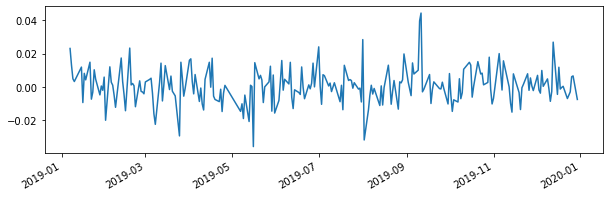

In [ ]:
# (参考) 特定の企業の変動パーセントを可視化
# 三菱ＵＦＪフィナンシャル・グループ (TSEコード：8306) を例とする
df_ratio['8306.JP'].plot(figsize=(10, 3))

### 変動パーセントに関する相関を求める
相関を求めるメソッドは corr() である。

In [ ]:
# 変動パーセントに関する相関
corr = df_ratio.corr()
corr

Symbols,7150.JP,7161.JP,7167.JP,7173.JP,7180.JP,7182.JP,7184.JP,7186.JP,7189.JP,8303.JP,8304.JP,8306.JP,8308.JP,8309.JP,8316.JP,8331.JP,8334.JP,8336.JP,8337.JP,8338.JP,8341.JP,8342.JP,8343.JP,8344.JP,8345.JP,8346.JP,8349.JP,8350.JP,8354.JP,8355.JP,8356.JP,8358.JP,8359.JP,8360.JP,8361.JP,8362.JP,8363.JP,8364.JP,8365.JP,8366.JP,8367.JP,8368.JP,8369.JP,8370.JP,8377.JP,8381.JP,8382.JP,8383.JP,8385.JP,8386.JP,8387.JP,8388.JP,8392.JP,8393.JP,8395.JP,8397.JP,8399.JP,8410.JP,8411.JP,8416.JP,8418.JP,8521.JP,8522.JP,8524.JP,8527.JP,8530.JP,8537.JP,8541.JP,8542.JP,8544.JP,8550.JP,8551.JP,8558.JP,8562.JP,8563.JP,8600.JP,8713.JP,8714.JP
Symbols,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7150.JP,1.000000,0.245054,0.336914,0.213654,0.210470,0.279441,0.277248,0.234084,0.346195,0.181581,0.235582,0.284019,0.267111,0.269852,0.323062,0.253833,0.329020,0.332527,0.249763,0.353959,0.287696,0.239574,0.290864,0.264685,0.260625,0.302631,0.215948,0.236696,0.269153,0.204594,0.337549,0.075802,0.260426,0.330045,0.325055,0.316768,0.244214,0.279183,0.172831,0.264616,0.305900,0.309063,0.322096,0.291229,0.288879,0.220966,0.306836,0.385327,0.298171,0.353625,0.285278,0.304337,0.225696,0.285180,0.438449,0.315825,0.325046,0.102572,0.317335,0.386569,0.231045,0.269789,0.304440,0.303816,0.296486,0.194615,0.335657,0.241758,0.250517,0.263415,0.277369,0.319681,0.219371,0.458594,0.277568,0.239797,0.225189,0.250510
7161.JP,0.245054,1.000000,0.406221,0.269657,0.238361,0.389032,0.453168,0.318842,0.433510,0.168935,0.316217,0.390409,0.274658,0.311449,0.316569,0.321139,0.413867,0.443440,0.421614,0.518626,0.336582,0.414849,0.382980,0.412118,0.383363,0.402995,0.373019,0.265086,0.270585,0.285279,0.382920,0.261949,0.353356,0.389375,0.398973,0.388637,0.287623,0.368677,0.341333,0.391528,0.340212,0.408959,0.322085,0.364985,0.385911,0.347172,0.313087,0.295390,0.423203,0.402448,0.390930,0.370792,0.343408,0.389511,0.462738,0.362564,0.341242,0.271111,0.330515,0.444362,0.404615,0.378163,0.407048,0.376861,0.373342,0.348326,0.454278,0.393787,0.427351,0.326672,0.491748,0.422857,0.401010,0.252795,0.396283,0.402736,0.491408,0.369272
7167.JP,0.336914,0.406221,1.000000,0.604681,0.632289,0.625219,0.565225,0.669461,0.747440,0.532757,0.579390,0.762103,0.699148,0.717933,0.750098,0.675650,0.756809,0.743775,0.482749,0.559933,0.664352,0.630294,0.636907,0.585656,0.628828,0.657287,0.471001,0.350744,0.542713,0.733555,0.665070,0.443061,0.675722,0.648374,0.708793,0.585503,0.609890,0.502438,0.362684,0.685853,0.632521,0.678243,0.709189,0.707209,0.772335,0.709753,0.684383,0.364691,0.782073,0.711073,0.614944,0.678448,0.521290,0.546742,0.641547,0.620905,0.658856,0.369526,0.674789,0.492992,0.740455,0.471146,0.640945,0.731957,0.578147,0.419376,0.483889,0.539995,0.400018,0.639477,0.550313,0.445026,0.569946,0.298148,0.431567,0.637966,0.501646,0.493067
7173.JP,0.213654,0.269657,0.604681,1.000000,0.559449,0.488490,0.545775,0.568950,0.587726,0.415121,0.445314,0.561375,0.520394,0.537530,0.563188,0.556587,0.573282,0.619259,0.377551,0.524579,0.544592,0.573219,0.546910,0.586390,0.582776,0.544847,0.472477,0.442009,0.460060,0.560640,0.546714,0.328923,0.558225,0.637303,0.606476,0.594966,0.558307,0.551968,0.212272,0.611987,0.579156,0.560978,0.588986,0.558749,0.575420,0.607846,0.555830,0.388231,0.626648,0.585948,0.586066,0.610052,0.632316,0.575910,0.580612,0.615579,0.594935,0.359915,0.517765,0.448349,0.555191,0.459851,0.621708,0.622515,0.566377,0.483251,0.498485,0.543652,0.402510,0.547562,0.501031,0.453659,0.563308,0.147964,0.386003,0.627278,0.434470,0.329894
7180.JP,0.210470,0.238361,0.632289,0.559449,1.000000,0.568060,0.486285,0.610449,0.607905,0.431347,0.442670,0.566457,0.542371,0.557685,0.627649,0.600812,0.599258,0.602620,0.340631,0.453033,0.539142,0.515261,0.484651,0.505593,0.533119,0.545677,0.408094,0.323548,0.507915,0.570731,0.553162,0.349056,0.559777,0.558939,0.549789,0.482357,0.479275,0.478792,0.246087,0.625826,0.568919,0.590094,0.628023,0.665236,0.665586,0.692909,0.651406,0.398618,0.

### ヒートマップを用いた可視化 (matplotlib 版)

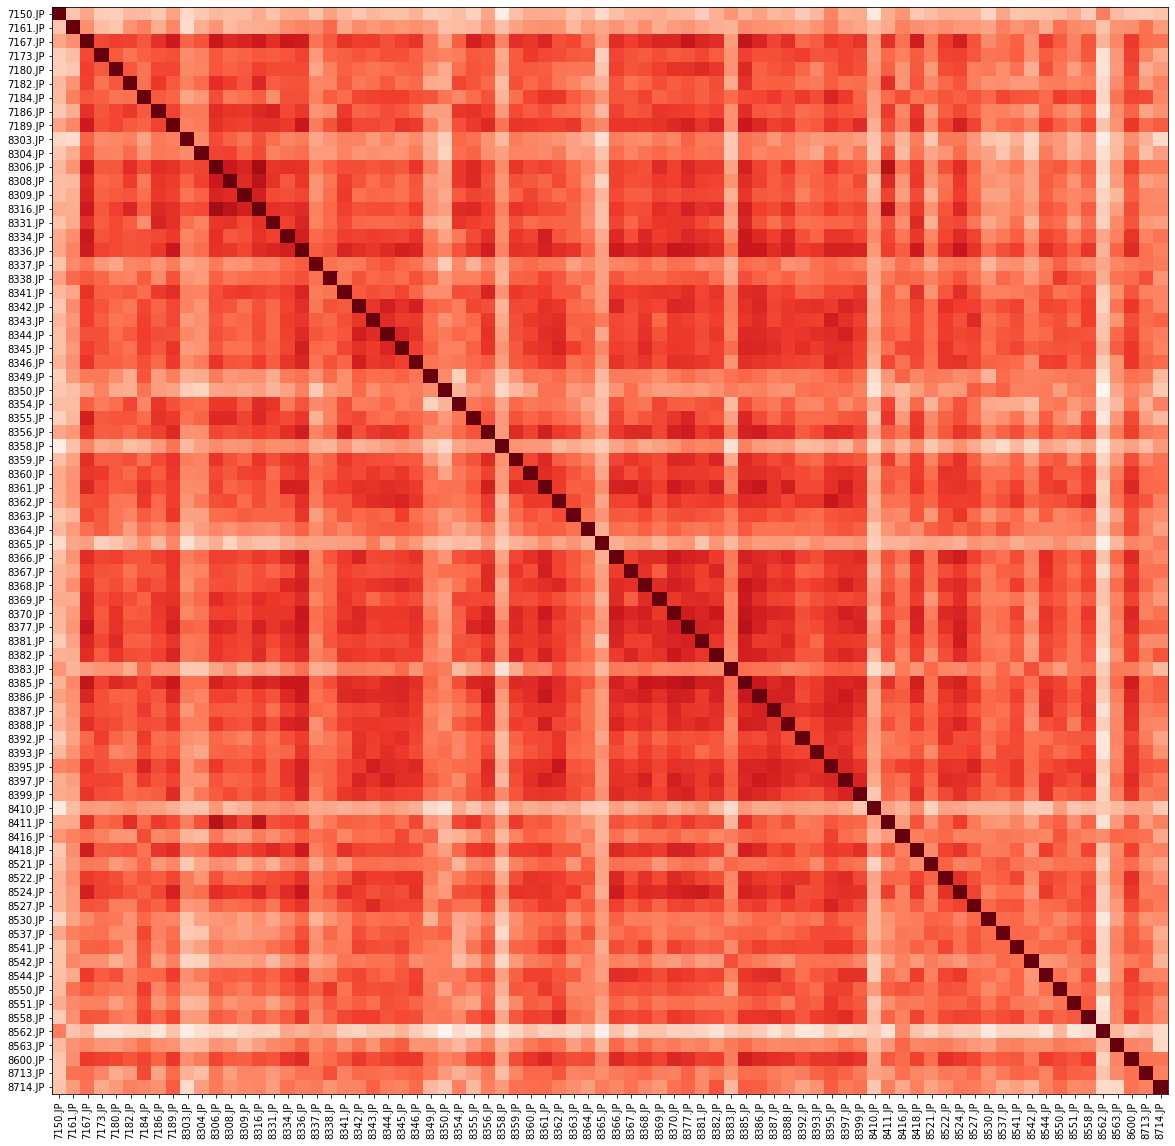

In [ ]:
# ヒートマップを用いた可視化
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 20))
plt.pcolor(corr, cmap="Reds")
plt.xticks(np.arange(0.5, len(corr.index), 1), corr.index, rotation=90)
plt.yticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
plt.gca().invert_yaxis()
plt.show()

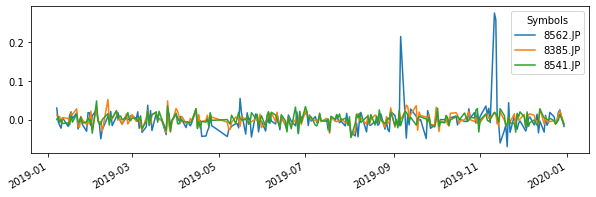

In [ ]:
# 他行との相関が低い 8562.JP(福島銀行)と 8385.JP(伊予銀行)，8541.JP(愛媛銀行)の変動％をプロット
df_ratio[['8562.JP','8385.JP', '8541.JP']].plot(figsize=(10, 3))

### 他行との相関の小さい銀行を取り出す
実行結果から福島銀行，島根銀行，富山銀行といった人口の少ない県の銀行が見つかった。
また，セブン銀行は既存の銀行とは業態が異なり，スルガ銀行は地方銀行ながらインターネットバンキングに注力しているという特徴がある。

In [ ]:
# 他行との相関の小さい銀行を取り出す
corr_mean = (corr.sum() - 1) / (len(corr.columns) - 1) # 相関値の平均
low_corr_top5 = list(corr_mean.sort_values()[:5].index) # 「相関値の平均」の小さい銀行トップ５
print(low_corr_top5)

# ticker symbol から銘柄名(社名)を取り出す
for code in low_corr_top5:
    TSE_code = int(code.split('.')[0])
    print("{}:{:.3f}:{}".format(code,
                                corr_mean[code],
                                banks[banks['TSEコード'] == TSE_code]['銘柄名'].values[0]))

['8562.JP', '7150.JP', '8410.JP', '8358.JP', '8365.JP']
8562.JP:0.210:福島銀行
7150.JP:0.278:島根銀行
8410.JP:0.312:セブン銀行
8358.JP:0.332:スルガ銀行
8365.JP:0.332:富山銀行


### ヒートマップを用いた可視化 (Plotly Express 版)
サイズの大きなヒートマップであるため，詳細を眺めたい場合は Plotly Express を用いるとよい。

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=corr,
                   x=corr.index,
                   y=corr.columns,
                   colorscale='Reds',
                   hoverongaps = False),
                layout=go.Layout(
                    width=900,
                    height=900))
fig['layout']['yaxis']['autorange'] = 'reversed' # これを付けないと縦軸が（思ったのと）逆向きになる
fig.show()

---

## ここまでのコードのまとめ

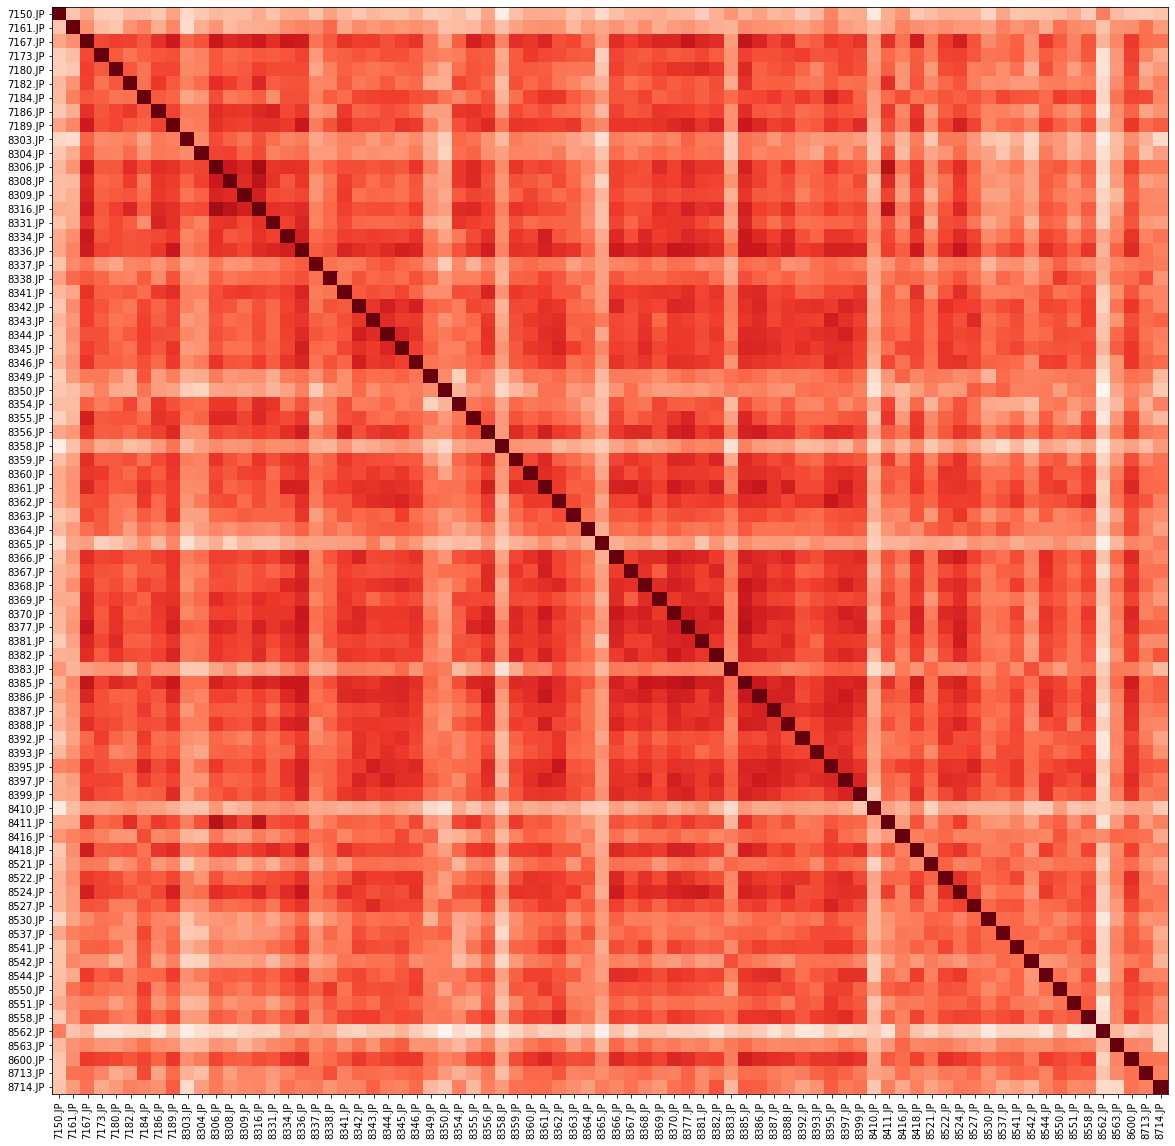

In [ ]:
import pandas as pd

# 東証一部上場企業リストの読み込み
companies = pd.read_csv('/content/drive/My Drive/BASE/EconomicData/TSE_corp_list.csv')

# 33業種区分を用いて「銀行業」のみに絞り込む
banks = companies[companies['33業種区分'] == '銀行業']
# print("企業数：{}".format(len(banks)))

# Pandas Datareader を利用した株価データの取得
from pandas_datareader import data
from datetime import datetime
import os

saved_path = '/content/drive/My Drive/BASE/EconomicData/bank.pkl'
if os.path.exists(saved_path): # 既にデータ取得済の場合，pickle 形式を読み込む
    df_bank = pd.read_pickle(saved_path)
else: # 新たにデータを取得し，(再度，実行する場合に備えて)pickle 形式で保存
    start = datetime(2019, 1, 1)
    end = datetime(2020, 12, 31)
    df_bank = data.DataReader(bank_codes, data_source='stooq', start=start, end=end)['Close']
    # pickle 形式で保存
    # (注) stooq に繰り返しアクセスすると，アクセス制限に引っかかる。そこで，取得したデータを pickle 形式で保存しておく。
    df_bank.to_pickle(saved_path)

# コロナ前のデータに絞り込む
# (メモ) df_bank.index のデータ型は datetime 型
condition = (datetime(2019,1,1) <= df_bank.index) & (df_bank.index <= datetime(2019,12,31))
df_bank = df_bank[condition]

# 変動パーセントの算出
df_ratio = df_bank.pct_change()

# 変動パーセントに関する相関
corr = df_ratio.corr()

# ヒートマップを用いた可視化
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 20))
plt.pcolor(corr, cmap="Reds")
plt.xticks(np.arange(0.5, len(corr.index), 1), corr.index, rotation=90)
plt.yticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
plt.gca().invert_yaxis()
plt.show()

---

# 課題
上記では業種「銀行業」に分類される企業群を対象として，かつコロナ前の株価推移の相関を調べた。
その結果，福島銀行，島根銀行，富山銀行といった人口の少ない県の銀行ならびにセブン銀行やスルガ銀行といった特徴的な業態を有する銀行が，他行との相関が小さいことが分かった。

1. コロナ禍(2020年)において，銀行業を営む企業群の中で他社と相関が低い（ゼロに近い）または負の値をとるケースについて，該当企業の業態等を深堀する形で調べて下さい。
1. 「食料品」や「不動産業」等，他の業種でも同様に試し，その結果を考察してください。

(注意)最終的に分析結果をレポートの形でまとめ，提出してください。(ipynb ファイルのみを提出しても駄目です）

---

# 参考：TSEコードから銘柄名(社名)を引っ張り出すコード
以下では TSEコード "8383" に該当する「鳥取銀行」を見出している。

In [ ]:
banks[banks['TSEコード'] == 8383]

,TSEコード,銘柄名,33業種コード,33業種区分,17業種コード,17業種区分
1761,8383,鳥取銀行,7050,銀行業,15,銀行
